# Combined NASA Aqua and Terra Satellites Overview -- Fraction of Photosynthetically Active Radiation (FPAR) and Leaf Area Index (LAI)
## EDS 220, Fall 2022

#### Authors
- Erika Egg, UC Santa Barbara Bren School of Environmental Science & Management: Master of Environmental Data Science (MEDS) (egg@bren.ucsb.edu)
- Alessandra Vidal Meza, UC Santa Barbara Bren School of Environmental Science & Management, Masters of Environmental Data Science (MEDS), avidalmeza@bren.ucsb.edu
- Elke Windschitl, UC Santa Barbara Bren School of Environmental Science & Management: Master of Environmental Data Science (MEDS), elke@bren.ucsb.edu

## Table of Contents

[1. Purpose](#purpose)

[2. Dataset Description](#overview)

[3. Data I/O](#io)

[4. Metadata Display and Basic Visualization](#display)

[5. Use Case Examples](#usecases)

[6. Create Binder Environment](#binder)

[7. References](#references)

<a id='purpose'></a> 
### Notebook Purpose

The purpose of this notebook is to explore ways to use the MCD15A3H Version 6.1 data product produced by MODIS instruments on board NASA's Terra and Aqua satellites. https://lpdaac.usgs.gov/products/mcd15a3hv061/ MCD15A3H contains data on Fraction of Photosynthetically Active Radiation (FPAR) and Leaf Area Index (LAI). Below, we describe what FPAR and LAI are in more detail, and we describe the resolution of the data, file formats, and known issues.

In this notebook we also provide examples for accessing the data from NASA using Google Earth Engine and reading the data into python. We provide code to access the bands and create histograms and time series plots. Then we provide two use case examples -- one for using FPAR and one for using LAI -- comparing and contrasting these metrics in the Chihuahuan Desert and Lacandón Jungle.

<a id='overview'></a> 
### Dataset Description

This portion of the notebook should contain a summary description of your chosen environmental dataset. In a few paragraphs, discuss:
- The creators of the dataset: NASA/NOAA/other government agency? Nonprofit? etc.
- Major characteristics of the dataset: global coverage? Spatial resolution? Temporal resolution? Creation date? 
- The file format(s) used to store the data: netCDF? CSV? Other?
- The source/archive you will be using to retrieve the data: Google Earth Engine? Agency data portal? Other API?
- Any known issues with data quality that might be expected to impact the results

Include links to any external resources needed to access the data here, including either the location of files stored on an external server you've set up or the access URL for a pre-existing repository. You can also include any example images you find useful for motivating the choice of dataset (optional).

**Here and throughout the notebook:** use a mix of markdown cells and code blocks to demonstrate your code. Markdown cells should be used to describe the purpose of the code blocks which follow them, but _do not replace_ comments within the code block! Make sure to include comments in the code as well illustrating the specific function of the various lines of code. Your later self - and other users - will thank you!

<a id='io'></a> 
### Dataset Input/Output 

Next, provide code to read in the data necessary for your analysis. This should be in the following order:


2) Set any parameters that will be needed during subsequent portions of the notebook. Typical examples of parameters include:
- names of any directories where data are stored
- ranges of years over which data are valid
- any thresholds or latitude/longitude ranges to be used later (e.g. dimensions of NINO3.4 region, threshold SSTA values for El Nino, etc.)

3) Read in the data! If the data files are very large, you may want to consider subsetting the portion of files to be read in (see examples of this during notebooks provided in Weeks 7 and 8).

Here is a good rule of thumb: It's good to aim for a relatively short amount of time needed to read in the data, since otherwise we'll be sitting around waiting for things to load for a long time. A  minute or two for data I/O is probably the max you'll want to target!

Use the code below to import all the necessary packages for analysis in this notebook and authenticate and initialize Google Earth Engine.

In [1]:
# Import packages
import ee
import geemap
import pandas as pd
import cartopy
import cartopy.crs as ccrs
from geemap import cartoee
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [2]:
# Authenticate and initialize GEE
# ee.Authenticate()
ee.Initialize()

Set time and space parameters to be used later.

In [3]:
# Create a time frame of interest
i_date = '2017-11-01' # Initial date of interest (inclusive).
f_data = '2022-11-01' # Final date of interest (exclusive).

# Create two regions of interest
POI_desert = ee.Geometry.Point(-106.506416, 31.767759) # Point for Chihuahuan Desert
POI_forest = ee.Geometry.Point(-91.59522999999996, 17.02141000000006) # Point for Lacandón Jungle
scale = 10000  # scale in meters

# Set coordinate reference system
crs_4326 = 'EPSG:4326'

Load the data using Google Earth Engine found here: https://developers.google.com/earth-engine/datasets/catalog/MODIS_061_MCD15A3H

In [4]:
# Load the MODIS FPAR and LAI data
gdat = ee.ImageCollection('MODIS/061/MCD15A3H')

<a id='display'></a> 
### Metadata Display and Basic Visualization

Next, provide some example commands to take a quick look at what is in your dataset. We've done some things along these lines in class by now, but you should include at least one of:

- Metadata display: commands to indicate a) which variables are included in the dataset and their names; b) coordinate information associated with the data variables; c) other important metadata parameters (site names, etc); and d) any important information on missing data
- Basic visualization: a "quick and dirty" plot showing generally what the data look like. Depending on your dataset, this could be either a time series or a map (no fancy coordinate reference system/projection needed yet).

In [5]:
first = gdat.first() # pull first image
bands = first.bandNames() # pull band names/variables
str(bands.getInfo()) # view metadata

"['Fpar', 'Lai', 'FparLai_QC', 'FparExtra_QC', 'FparStdDev', 'LaiStdDev']"

In [6]:
# create time series for FPAR variable in desert
fparD = gdat.select('Fpar') # select band name/variable for FPAR
fpar_tsD = fparD.getRegion(POI_desert, scale).getInfo() # extract data
df_fparD = pd.DataFrame(fpar_tsD).dropna() # save data frame

headers_1 = df_fparD.loc[0] # extract headers
df_fparD = pd.DataFrame(df_fparD.values[1:], columns = headers_1) # add headers
print(df_fparD)

0             id   longitude   latitude           time Fpar
0     2002_07_04 -106.495277  31.755445  1025740800000    9
1     2002_07_08 -106.495277  31.755445  1026086400000   10
2     2002_07_12 -106.495277  31.755445  1026432000000    9
3     2002_07_16 -106.495277  31.755445  1026777600000    9
4     2002_07_20 -106.495277  31.755445  1027123200000    8
...          ...         ...        ...            ...  ...
1856  2022_10_04 -106.495277  31.755445  1664841600000   13
1857  2022_10_08 -106.495277  31.755445  1665187200000   11
1858  2022_10_24 -106.495277  31.755445  1666569600000   15
1859  2022_10_28 -106.495277  31.755445  1666915200000   14
1860  2022_11_01 -106.495277  31.755445  1667260800000   14

[1861 rows x 5 columns]


/opt/python/3.10.5/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/python/3.10.5/lib/python3.10/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/python/3.10.5/lib/python3.10/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'FPAR (%)')

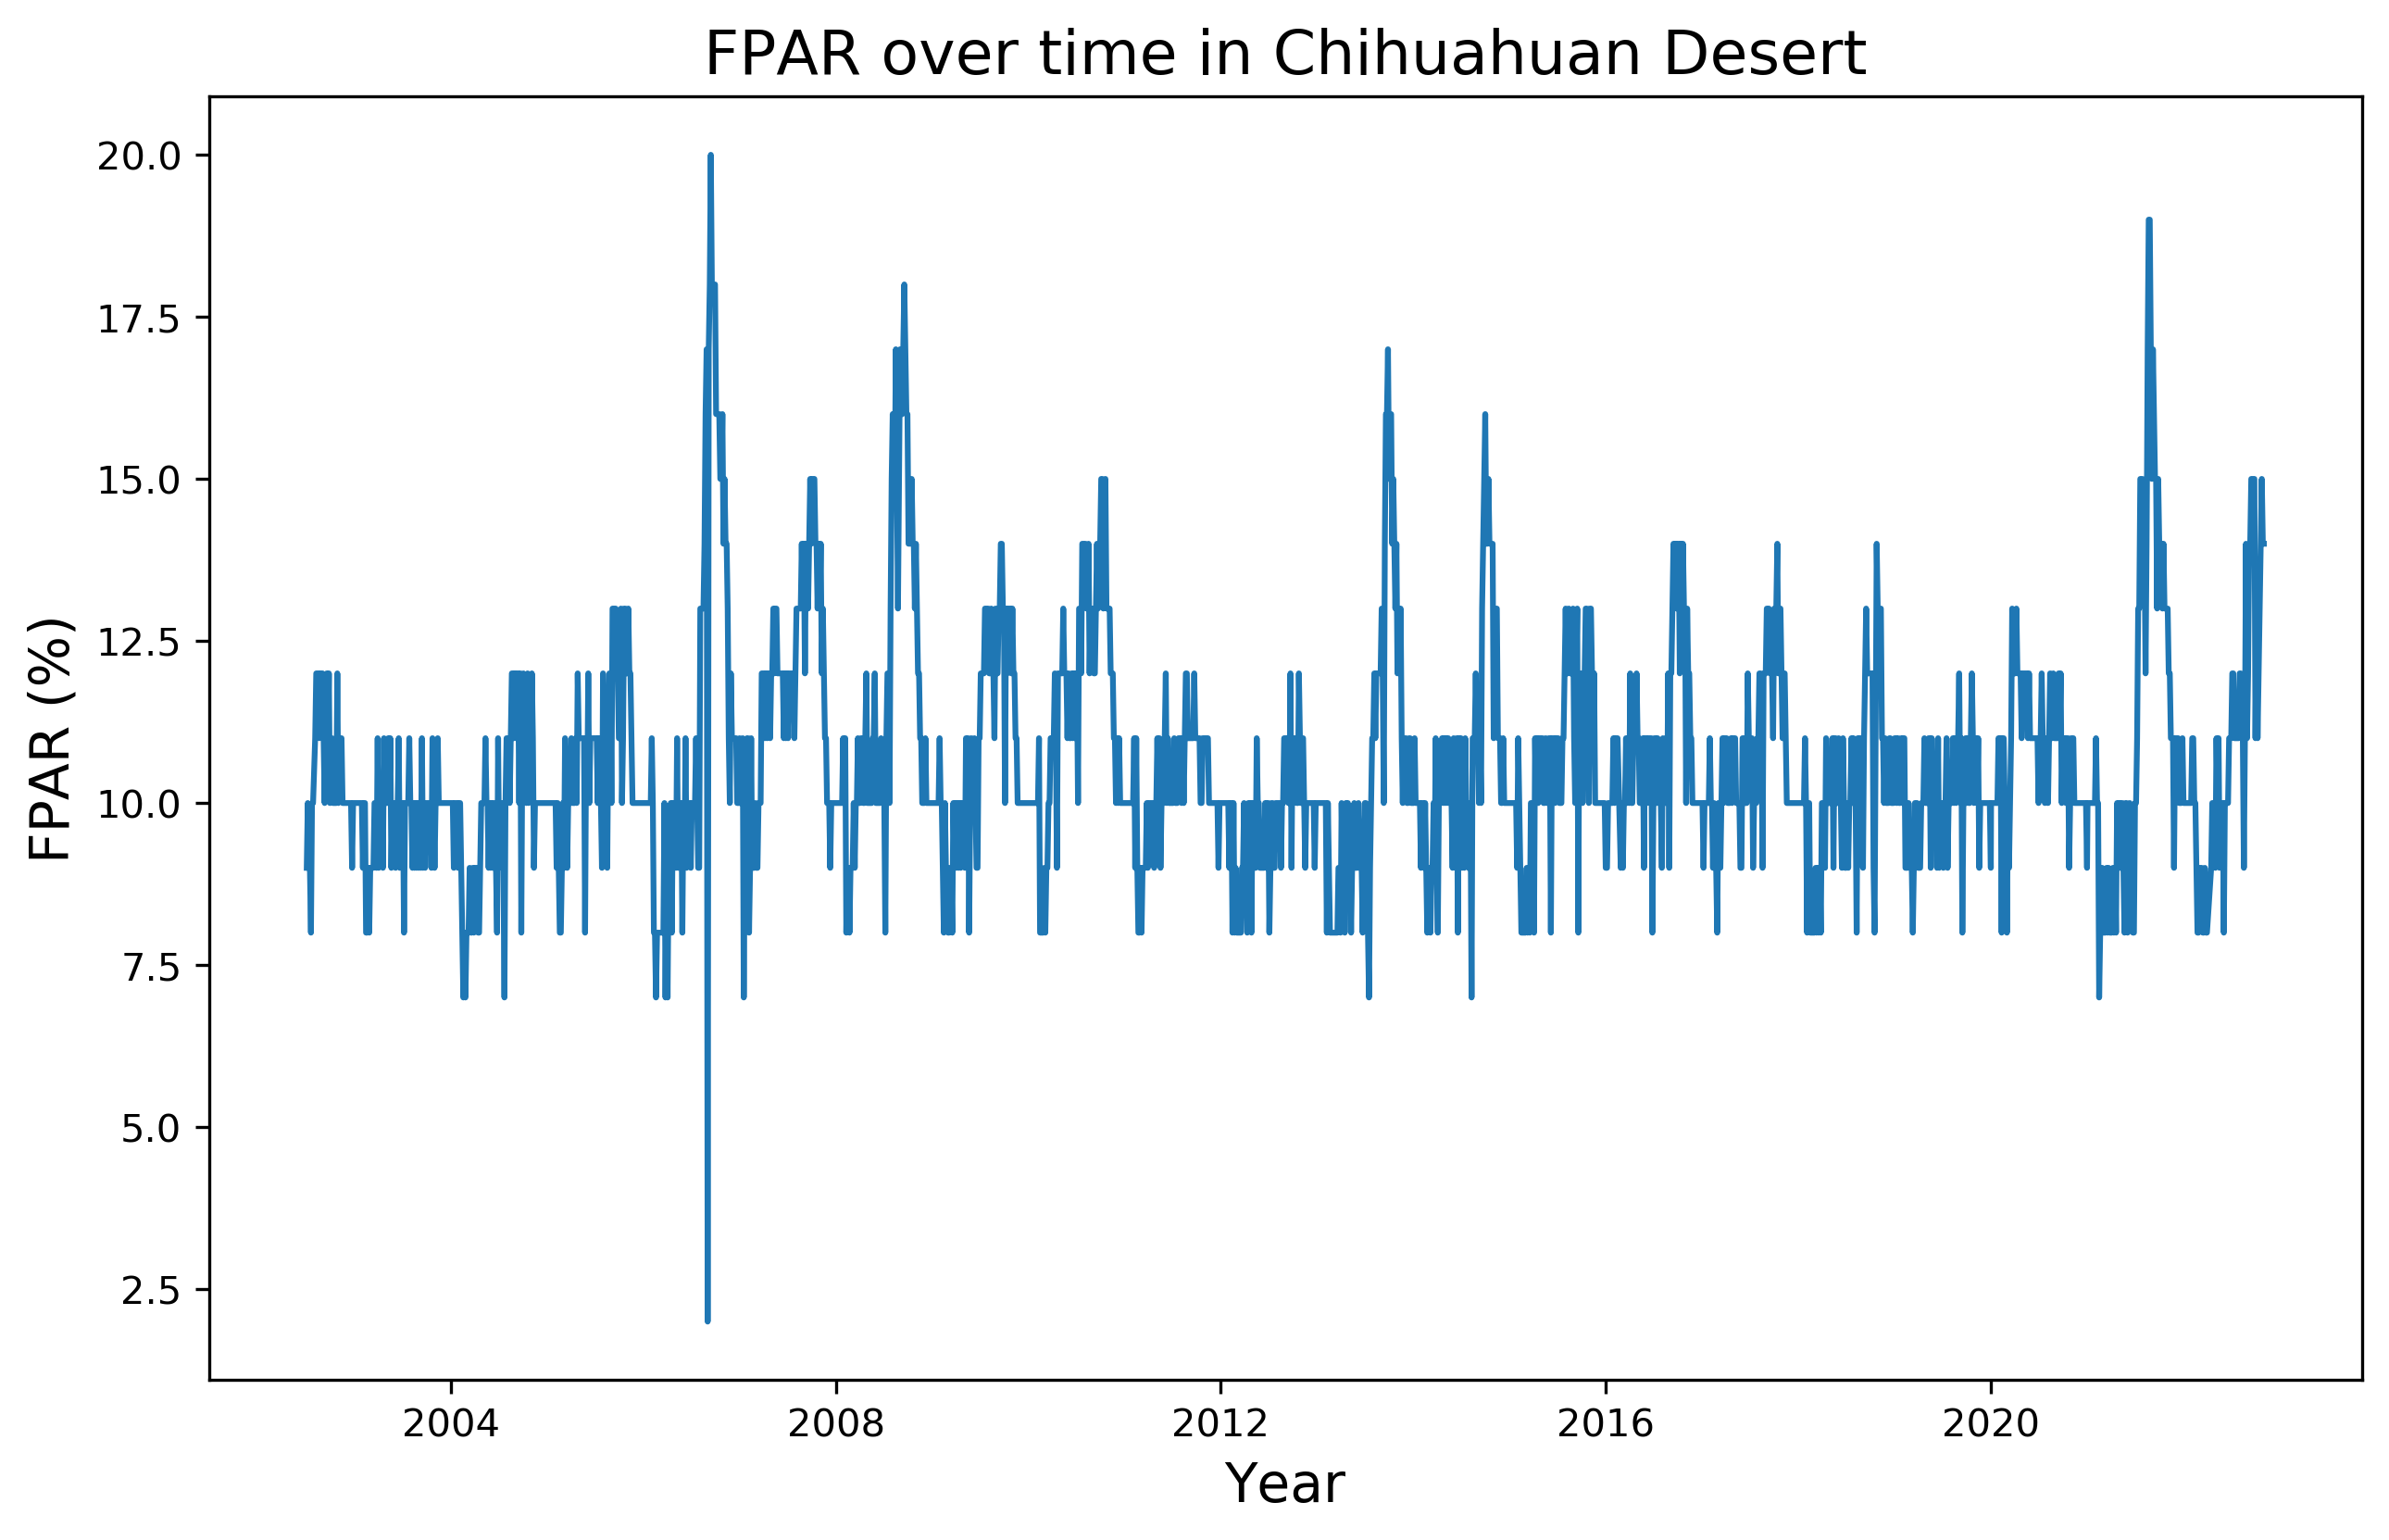

In [7]:
# Make time a datetime
df_fparD['datetime'] = pd.to_datetime(df_fparD['time'], unit = 'ms')

# Plot the time series
plt.figure(figsize=(10, 6), dpi=300)    # create a new figure, set size and resolution (dpi)
plt.plot(df_fparD['datetime'],df_fparD['Fpar'])   # add data to the plot
plt.title('FPAR over time in Chihuahuan Desert', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('FPAR (%)', fontsize=14)  

In [8]:
# create time series for FPAR variable in forest
fparF = gdat.select('Fpar') # select band name/variable for FPAR
fpar_tsF = fparF.getRegion(POI_forest, scale).getInfo() # extract data
df_fparF = pd.DataFrame(fpar_tsF).dropna() # save data frame

df_fparF = pd.DataFrame(df_fparF.values[1:], columns = headers_1) # add headers
print(df_fparF) # view data frame 

0             id  longitude   latitude           time Fpar
0     2002_07_04 -91.583243  17.023075  1025740800000   69
1     2002_07_08 -91.583243  17.023075  1026086400000   72
2     2002_07_12 -91.583243  17.023075  1026432000000   40
3     2002_07_16 -91.583243  17.023075  1026777600000   76
4     2002_07_20 -91.583243  17.023075  1027123200000   83
...          ...        ...        ...            ...  ...
1856  2022_10_04 -91.583243  17.023075  1664841600000   72
1857  2022_10_08 -91.583243  17.023075  1665187200000   42
1858  2022_10_24 -91.583243  17.023075  1666569600000   85
1859  2022_10_28 -91.583243  17.023075  1666915200000   88
1860  2022_11_01 -91.583243  17.023075  1667260800000   86

[1861 rows x 5 columns]


/opt/python/3.10.5/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/python/3.10.5/lib/python3.10/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/python/3.10.5/lib/python3.10/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'FPAR (%)')

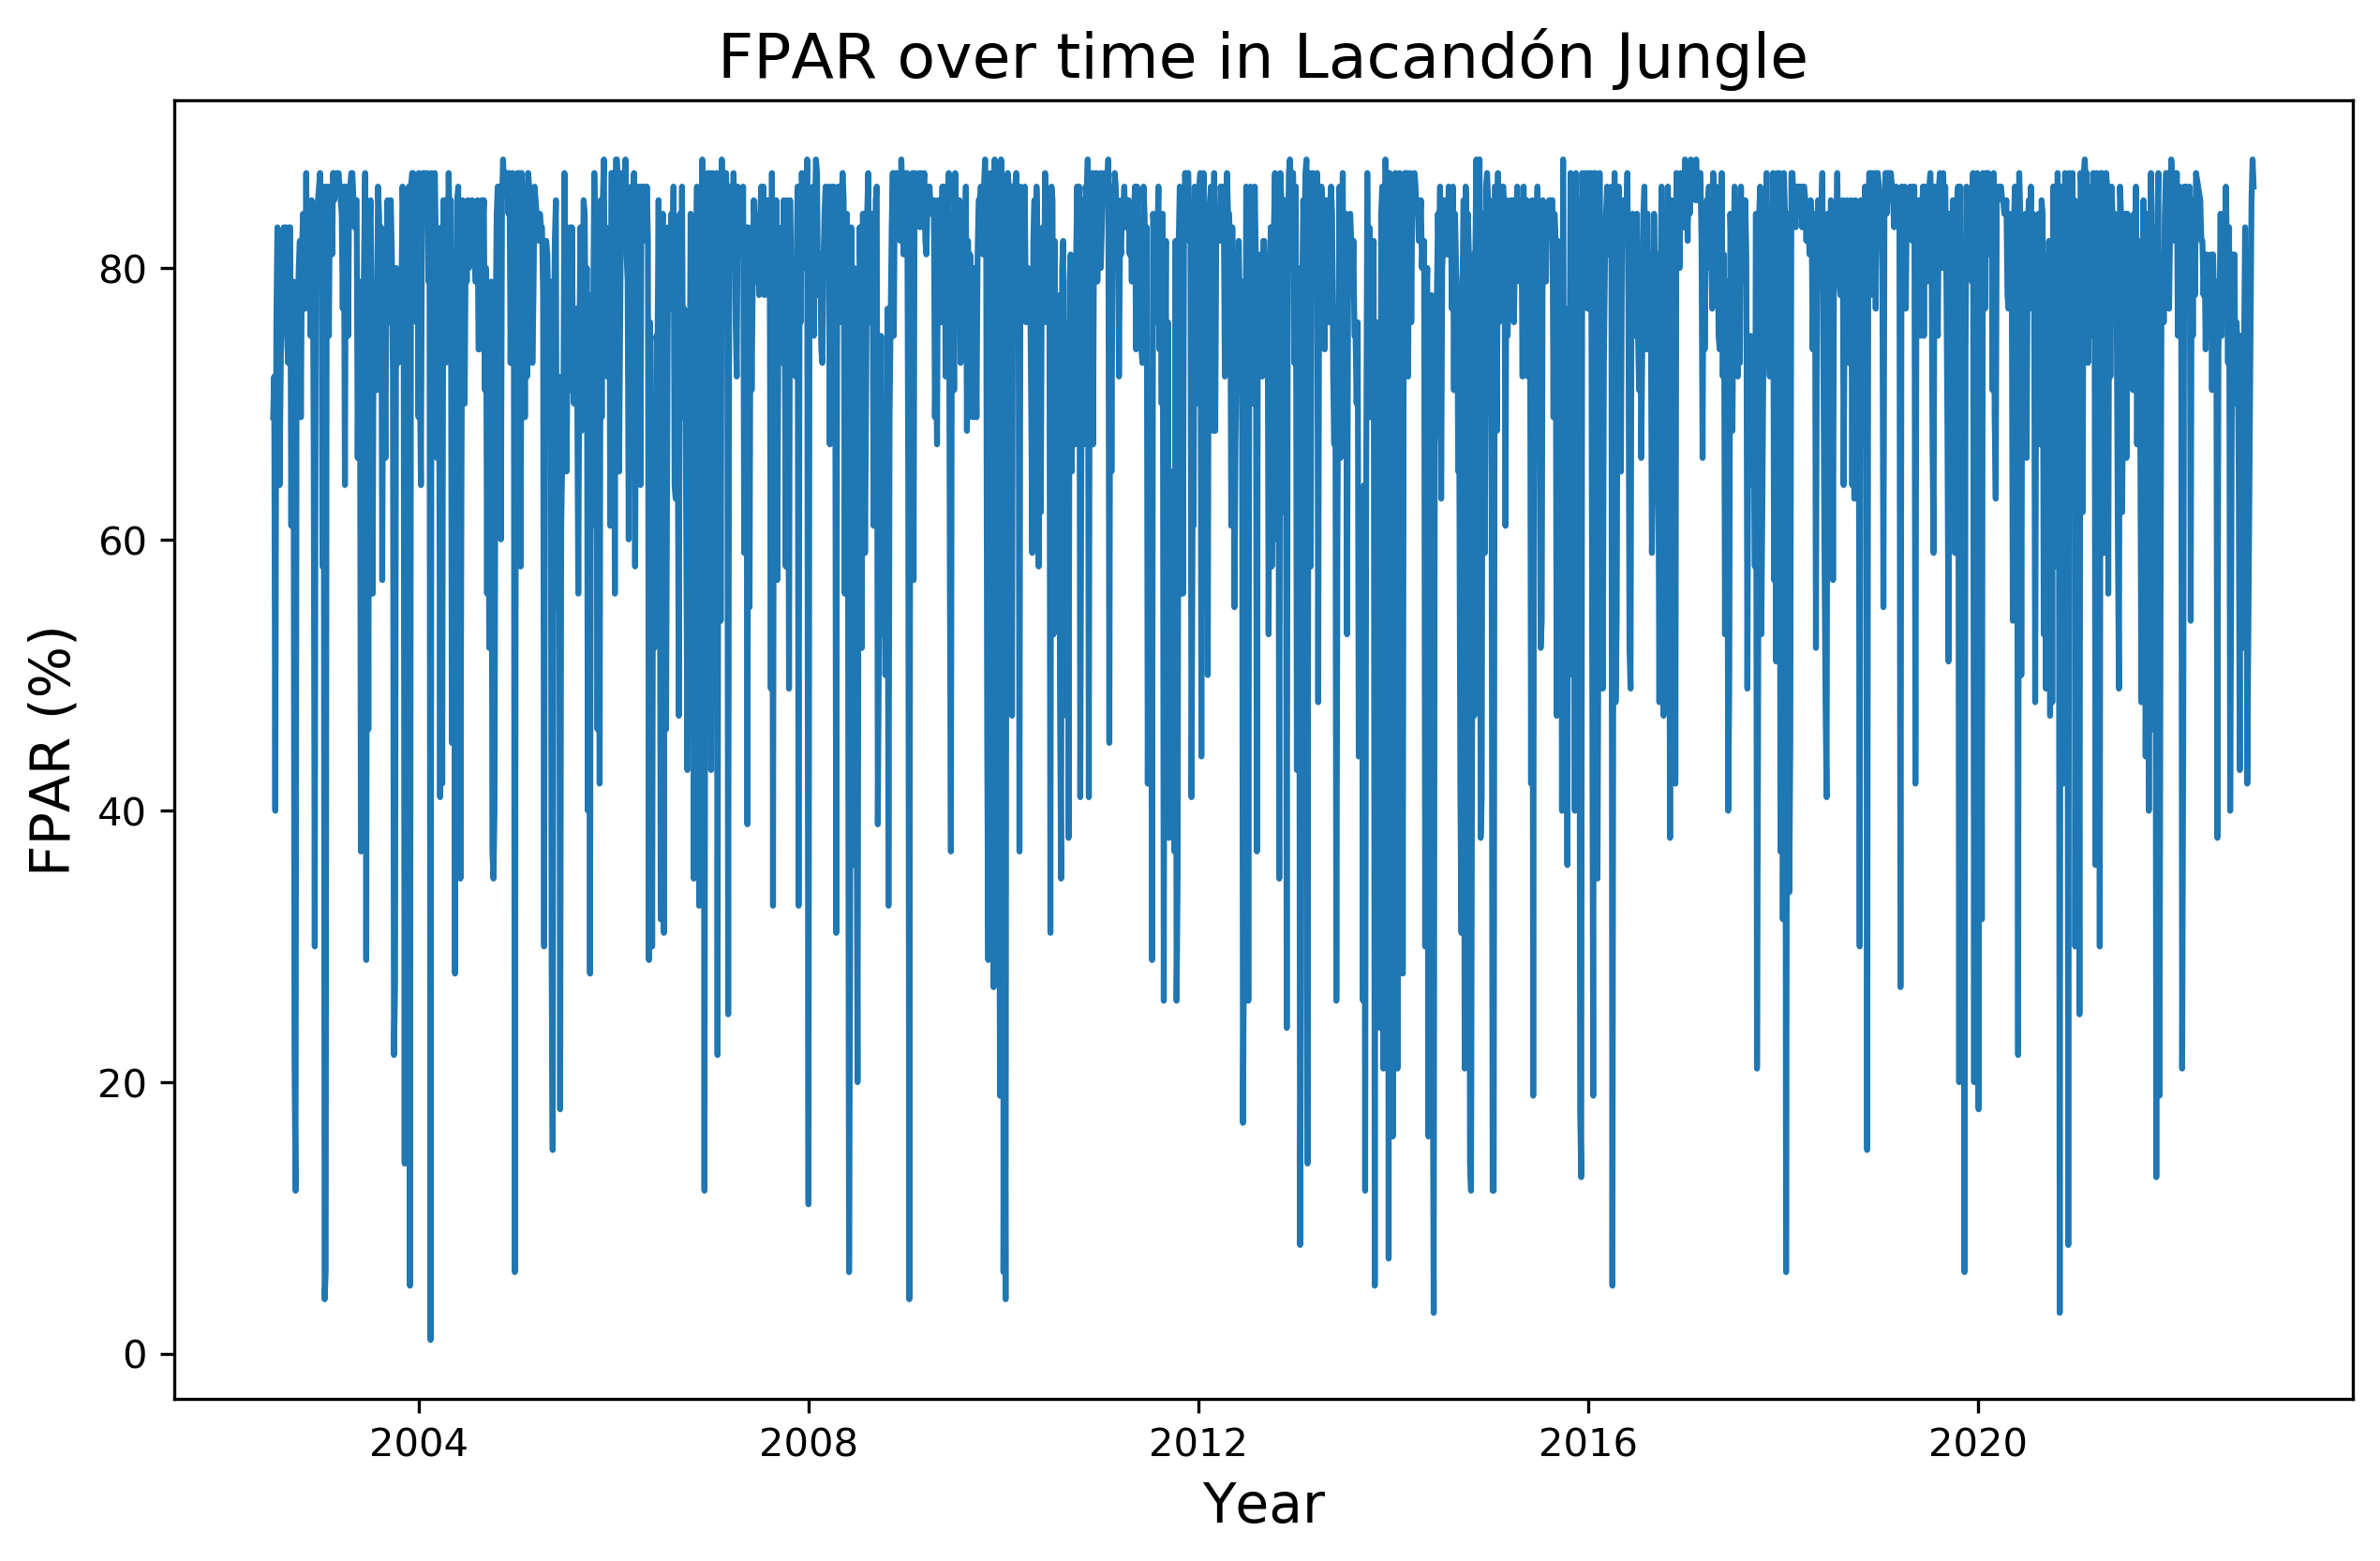

In [9]:
# Make time a datetime
df_fparF['datetime'] = pd.to_datetime(df_fparF['time'], unit = 'ms')

# Plot the time series
plt.figure(figsize=(10, 6), dpi=300)    # create a new figure, set size and resolution (dpi)
plt.plot(df_fparF['datetime'],df_fparF['Fpar'])   # add data to the plot
plt.title('FPAR over time in Lacandón Jungle', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('FPAR (%)', fontsize=14)  

In [10]:
# create time series for leaf area index variable in desert
laiD = gdat.select('Lai') # select band name/variable for leaf area index
lai_tsD = laiD.getRegion(POI_desert, scale).getInfo() # extract data
df_laiD = pd.DataFrame(lai_tsD).dropna() # save data frame

headers_2 = df_laiD.loc[0] # extract headers
df_laiD = pd.DataFrame(df_laiD.values[1:], columns = headers_2) # add headers
print(df_laiD) # view data frame 

0             id   longitude   latitude           time Lai
0     2002_07_04 -106.495277  31.755445  1025740800000   2
1     2002_07_08 -106.495277  31.755445  1026086400000   2
2     2002_07_12 -106.495277  31.755445  1026432000000   2
3     2002_07_16 -106.495277  31.755445  1026777600000   2
4     2002_07_20 -106.495277  31.755445  1027123200000   2
...          ...         ...        ...            ...  ..
1856  2022_10_04 -106.495277  31.755445  1664841600000   2
1857  2022_10_08 -106.495277  31.755445  1665187200000   2
1858  2022_10_24 -106.495277  31.755445  1666569600000   2
1859  2022_10_28 -106.495277  31.755445  1666915200000   2
1860  2022_11_01 -106.495277  31.755445  1667260800000   2

[1861 rows x 5 columns]


/opt/python/3.10.5/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/python/3.10.5/lib/python3.10/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/python/3.10.5/lib/python3.10/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'LAI (m²/m²)')

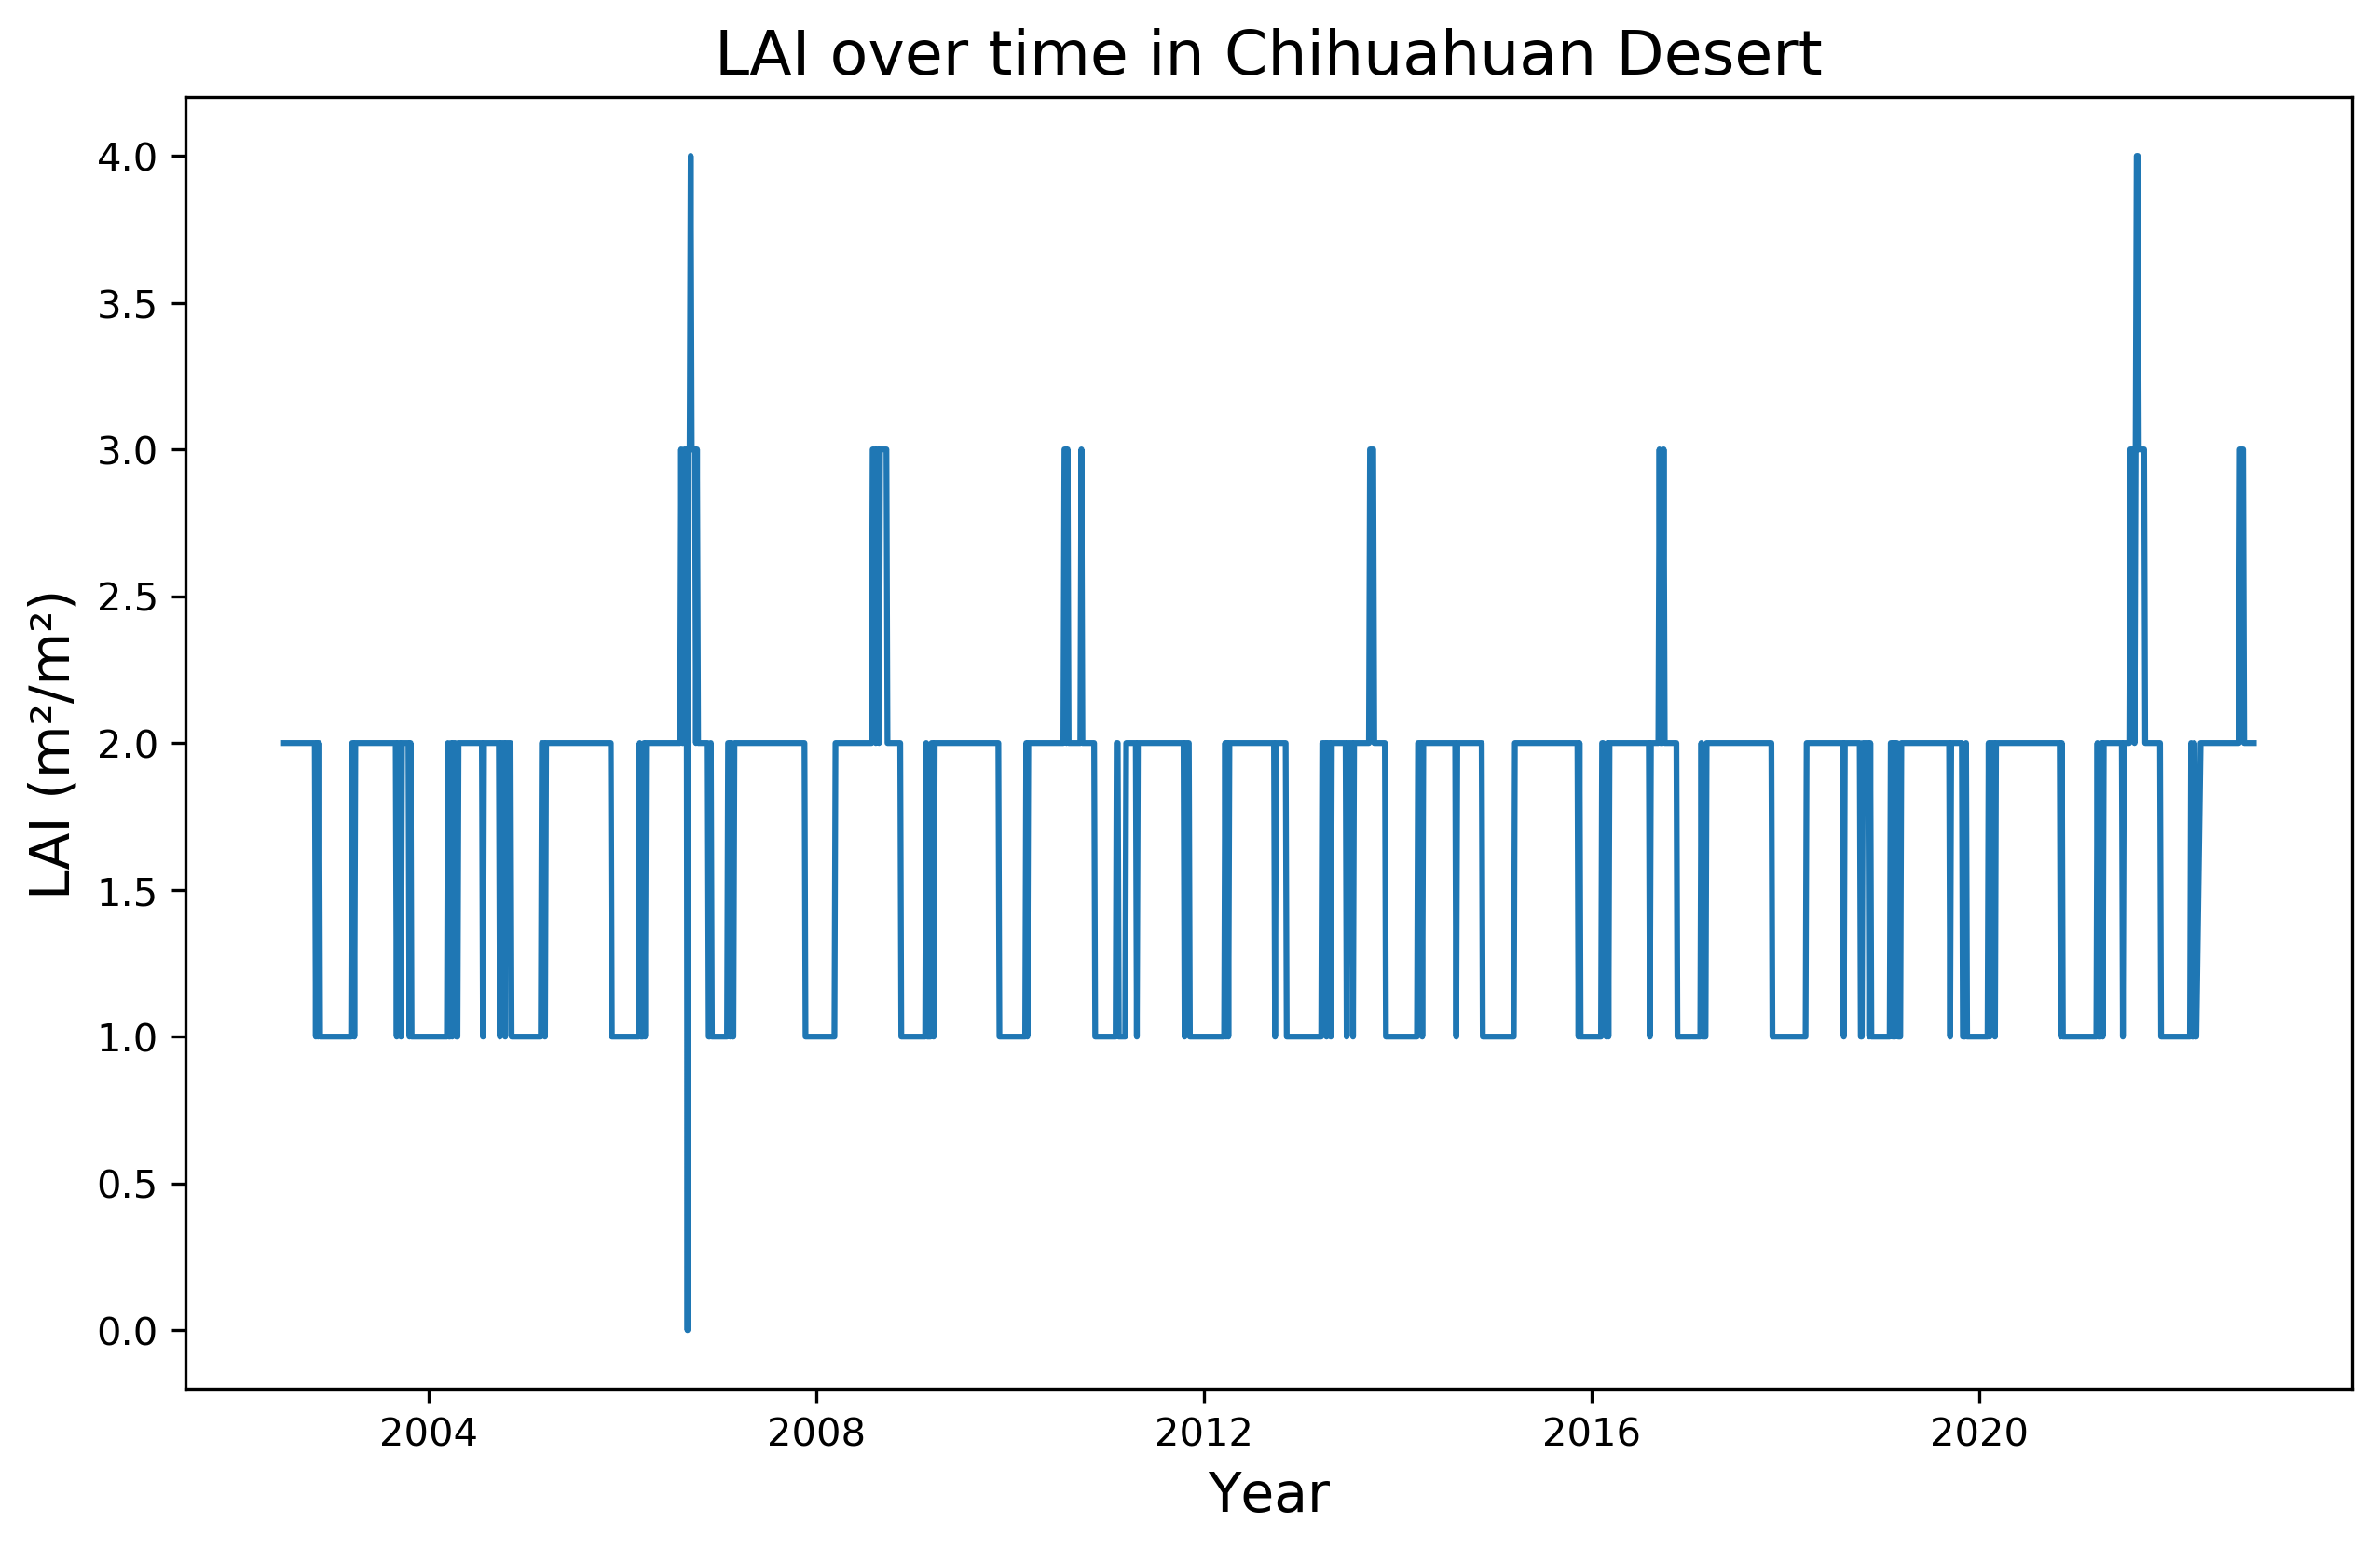

In [11]:
# Make time a datetime
df_laiD['datetime'] = pd.to_datetime(df_laiD['time'], unit = 'ms')

# Plot the time series
plt.figure(figsize=(10, 6), dpi=300)    # create a new figure, set size and resolution (dpi)
plt.plot(df_laiD['datetime'],df_laiD['Lai'])   # add data to the plot
plt.title('LAI over time in Chihuahuan Desert', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('LAI (m²/m²)', fontsize=14) 

In [12]:
# create time series for leaf area index variable in forest
laiF = gdat.select('Lai') # select band name/variable for leaf area index
lai_tsF = laiF.getRegion(POI_forest, scale).getInfo() # extract data
df_laiF = pd.DataFrame(lai_tsF).dropna() # save data frame

df_laiF = pd.DataFrame(df_laiF.values[1:], columns = headers_2) # add headers
print(df_laiF) # view data frame 

0             id  longitude   latitude           time Lai
0     2002_07_04 -91.583243  17.023075  1025740800000  35
1     2002_07_08 -91.583243  17.023075  1026086400000  40
2     2002_07_12 -91.583243  17.023075  1026432000000  11
3     2002_07_16 -91.583243  17.023075  1026777600000  44
4     2002_07_20 -91.583243  17.023075  1027123200000  51
...          ...        ...        ...            ...  ..
1856  2022_10_04 -91.583243  17.023075  1664841600000  39
1857  2022_10_08 -91.583243  17.023075  1665187200000  18
1858  2022_10_24 -91.583243  17.023075  1666569600000  54
1859  2022_10_28 -91.583243  17.023075  1666915200000  56
1860  2022_11_01 -91.583243  17.023075  1667260800000  52

[1861 rows x 5 columns]


/opt/python/3.10.5/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/python/3.10.5/lib/python3.10/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/python/3.10.5/lib/python3.10/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'LAI (m²/m²)')

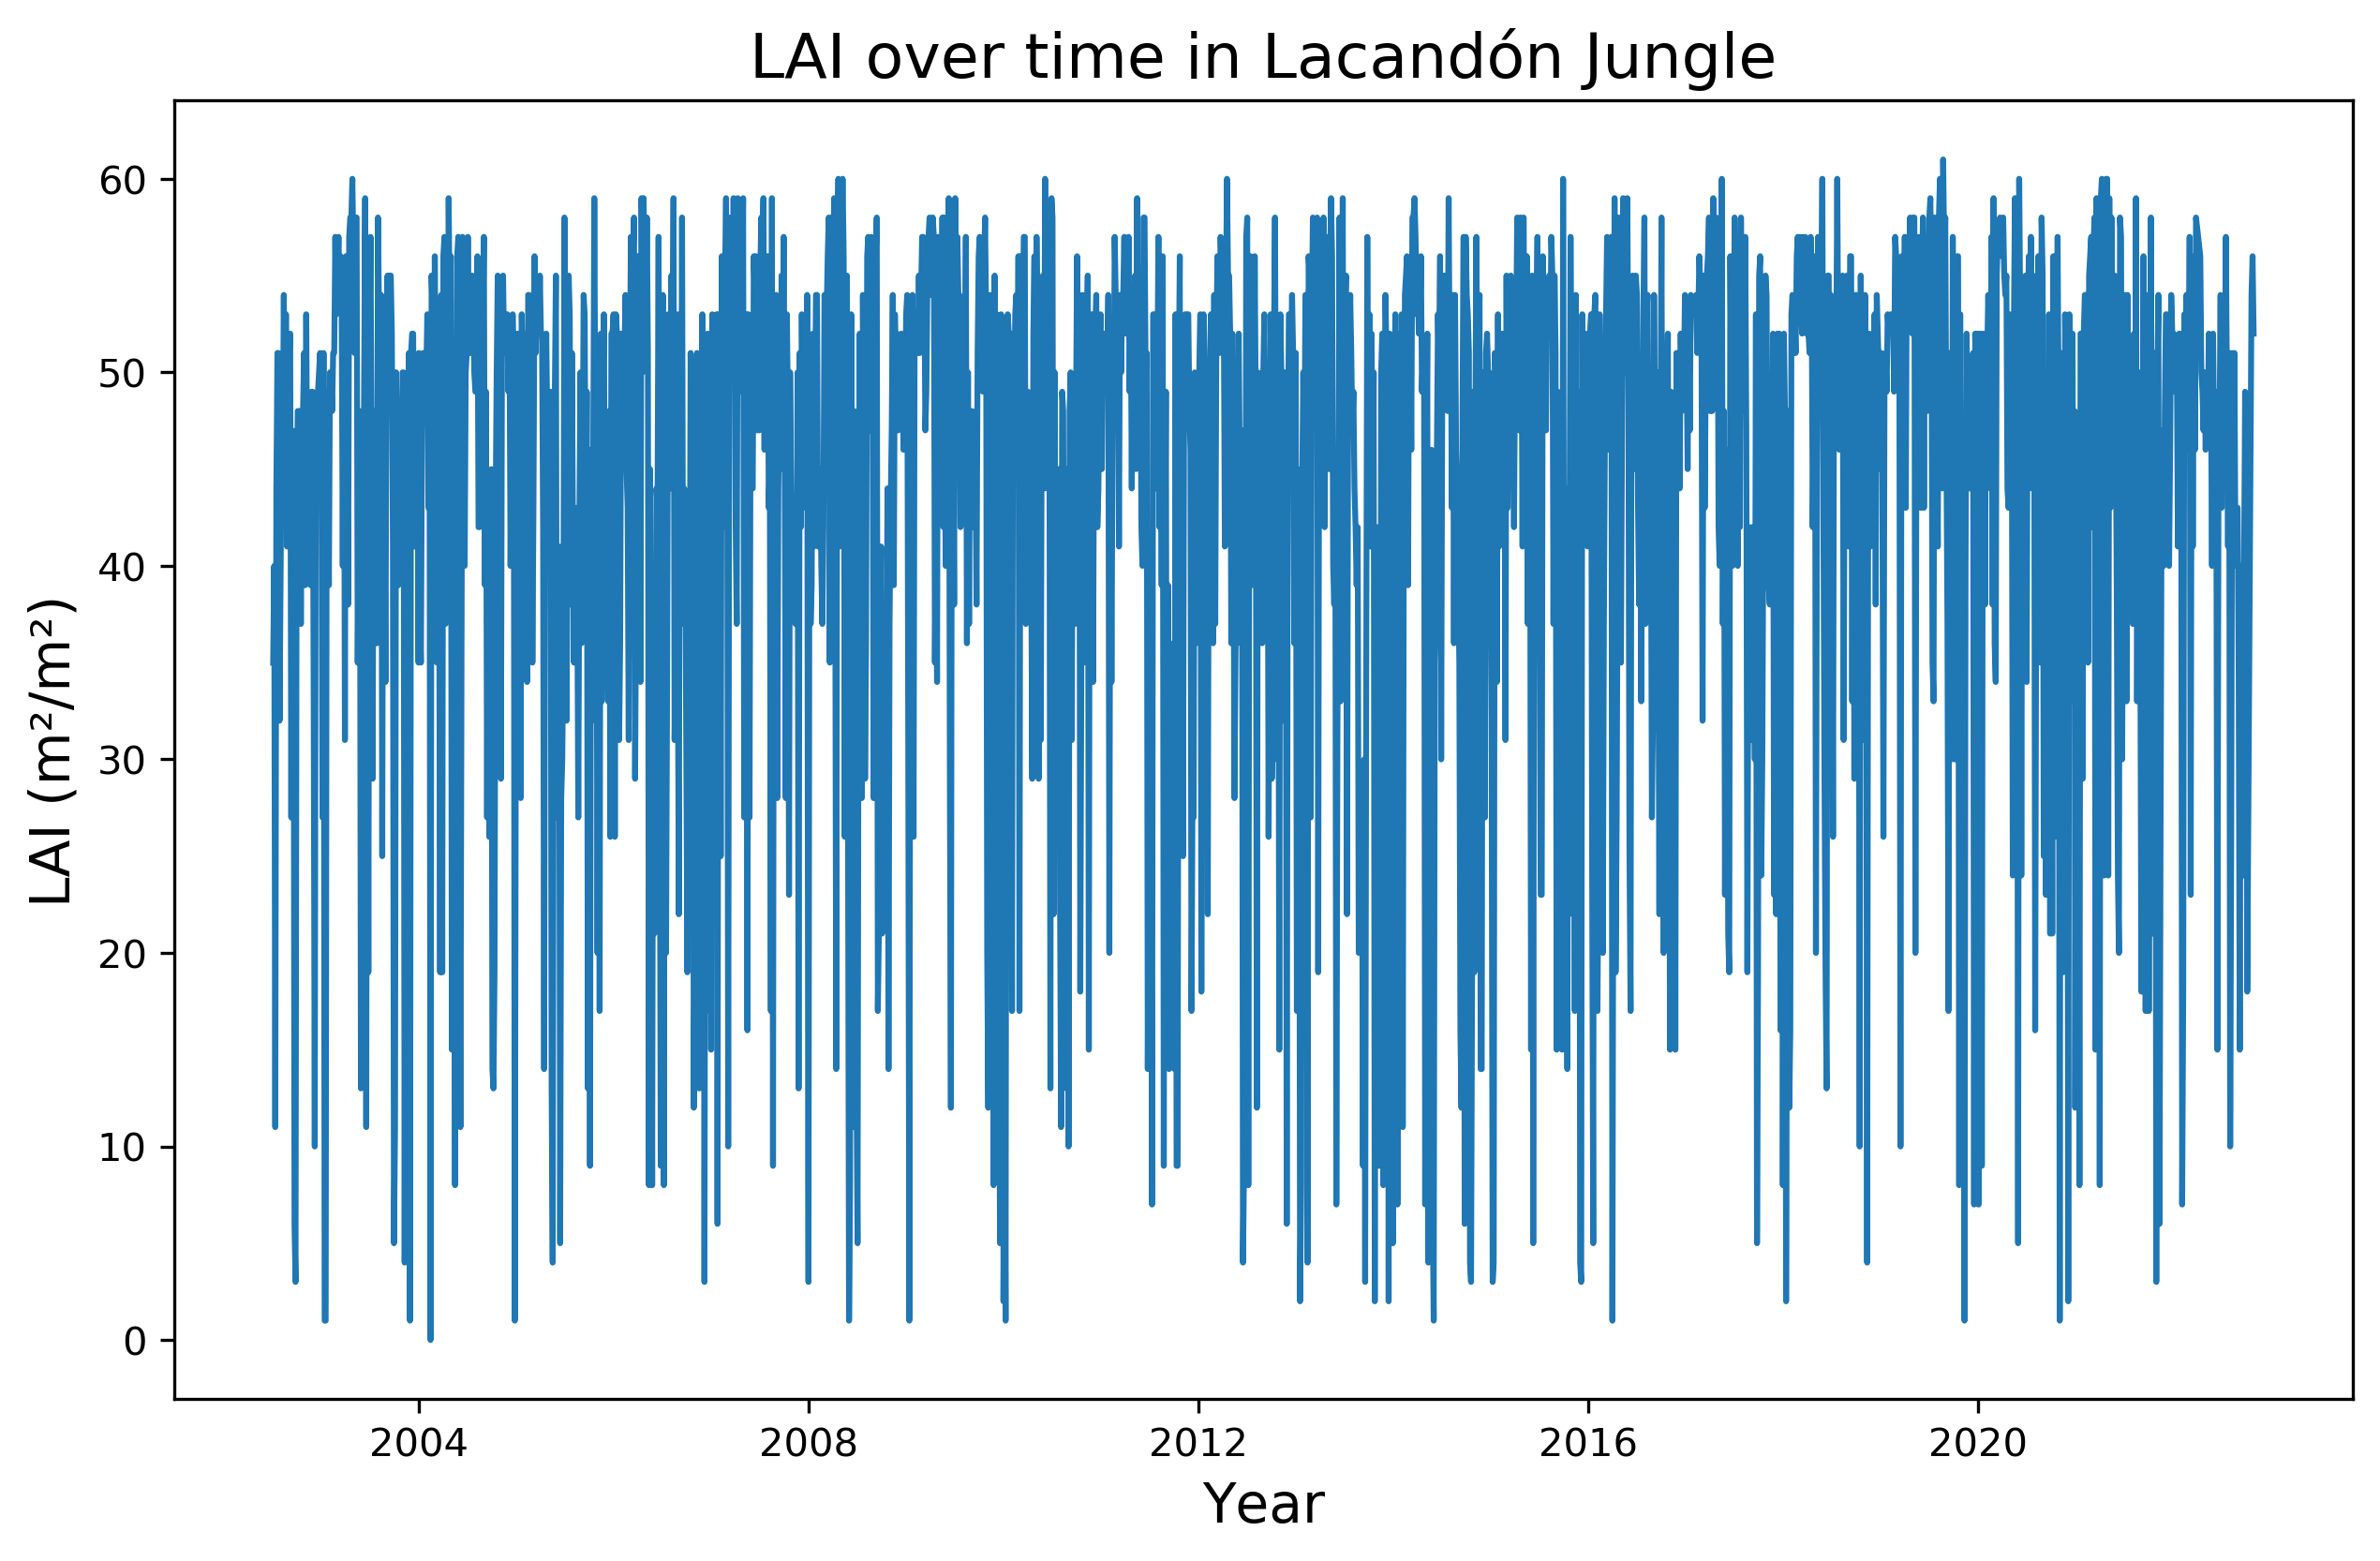

In [13]:
# Make time a datetime
df_laiF['datetime'] = pd.to_datetime(df_laiF['time'], unit = 'ms')

# Plot the time series
plt.figure(figsize=(10, 6), dpi=300)    # create a new figure, set size and resolution (dpi)
plt.plot(df_laiF['datetime'],df_laiF['Lai'])   # add data to the plot
plt.title('LAI over time in Lacandón Jungle', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('LAI (m²/m²)', fontsize=14) 

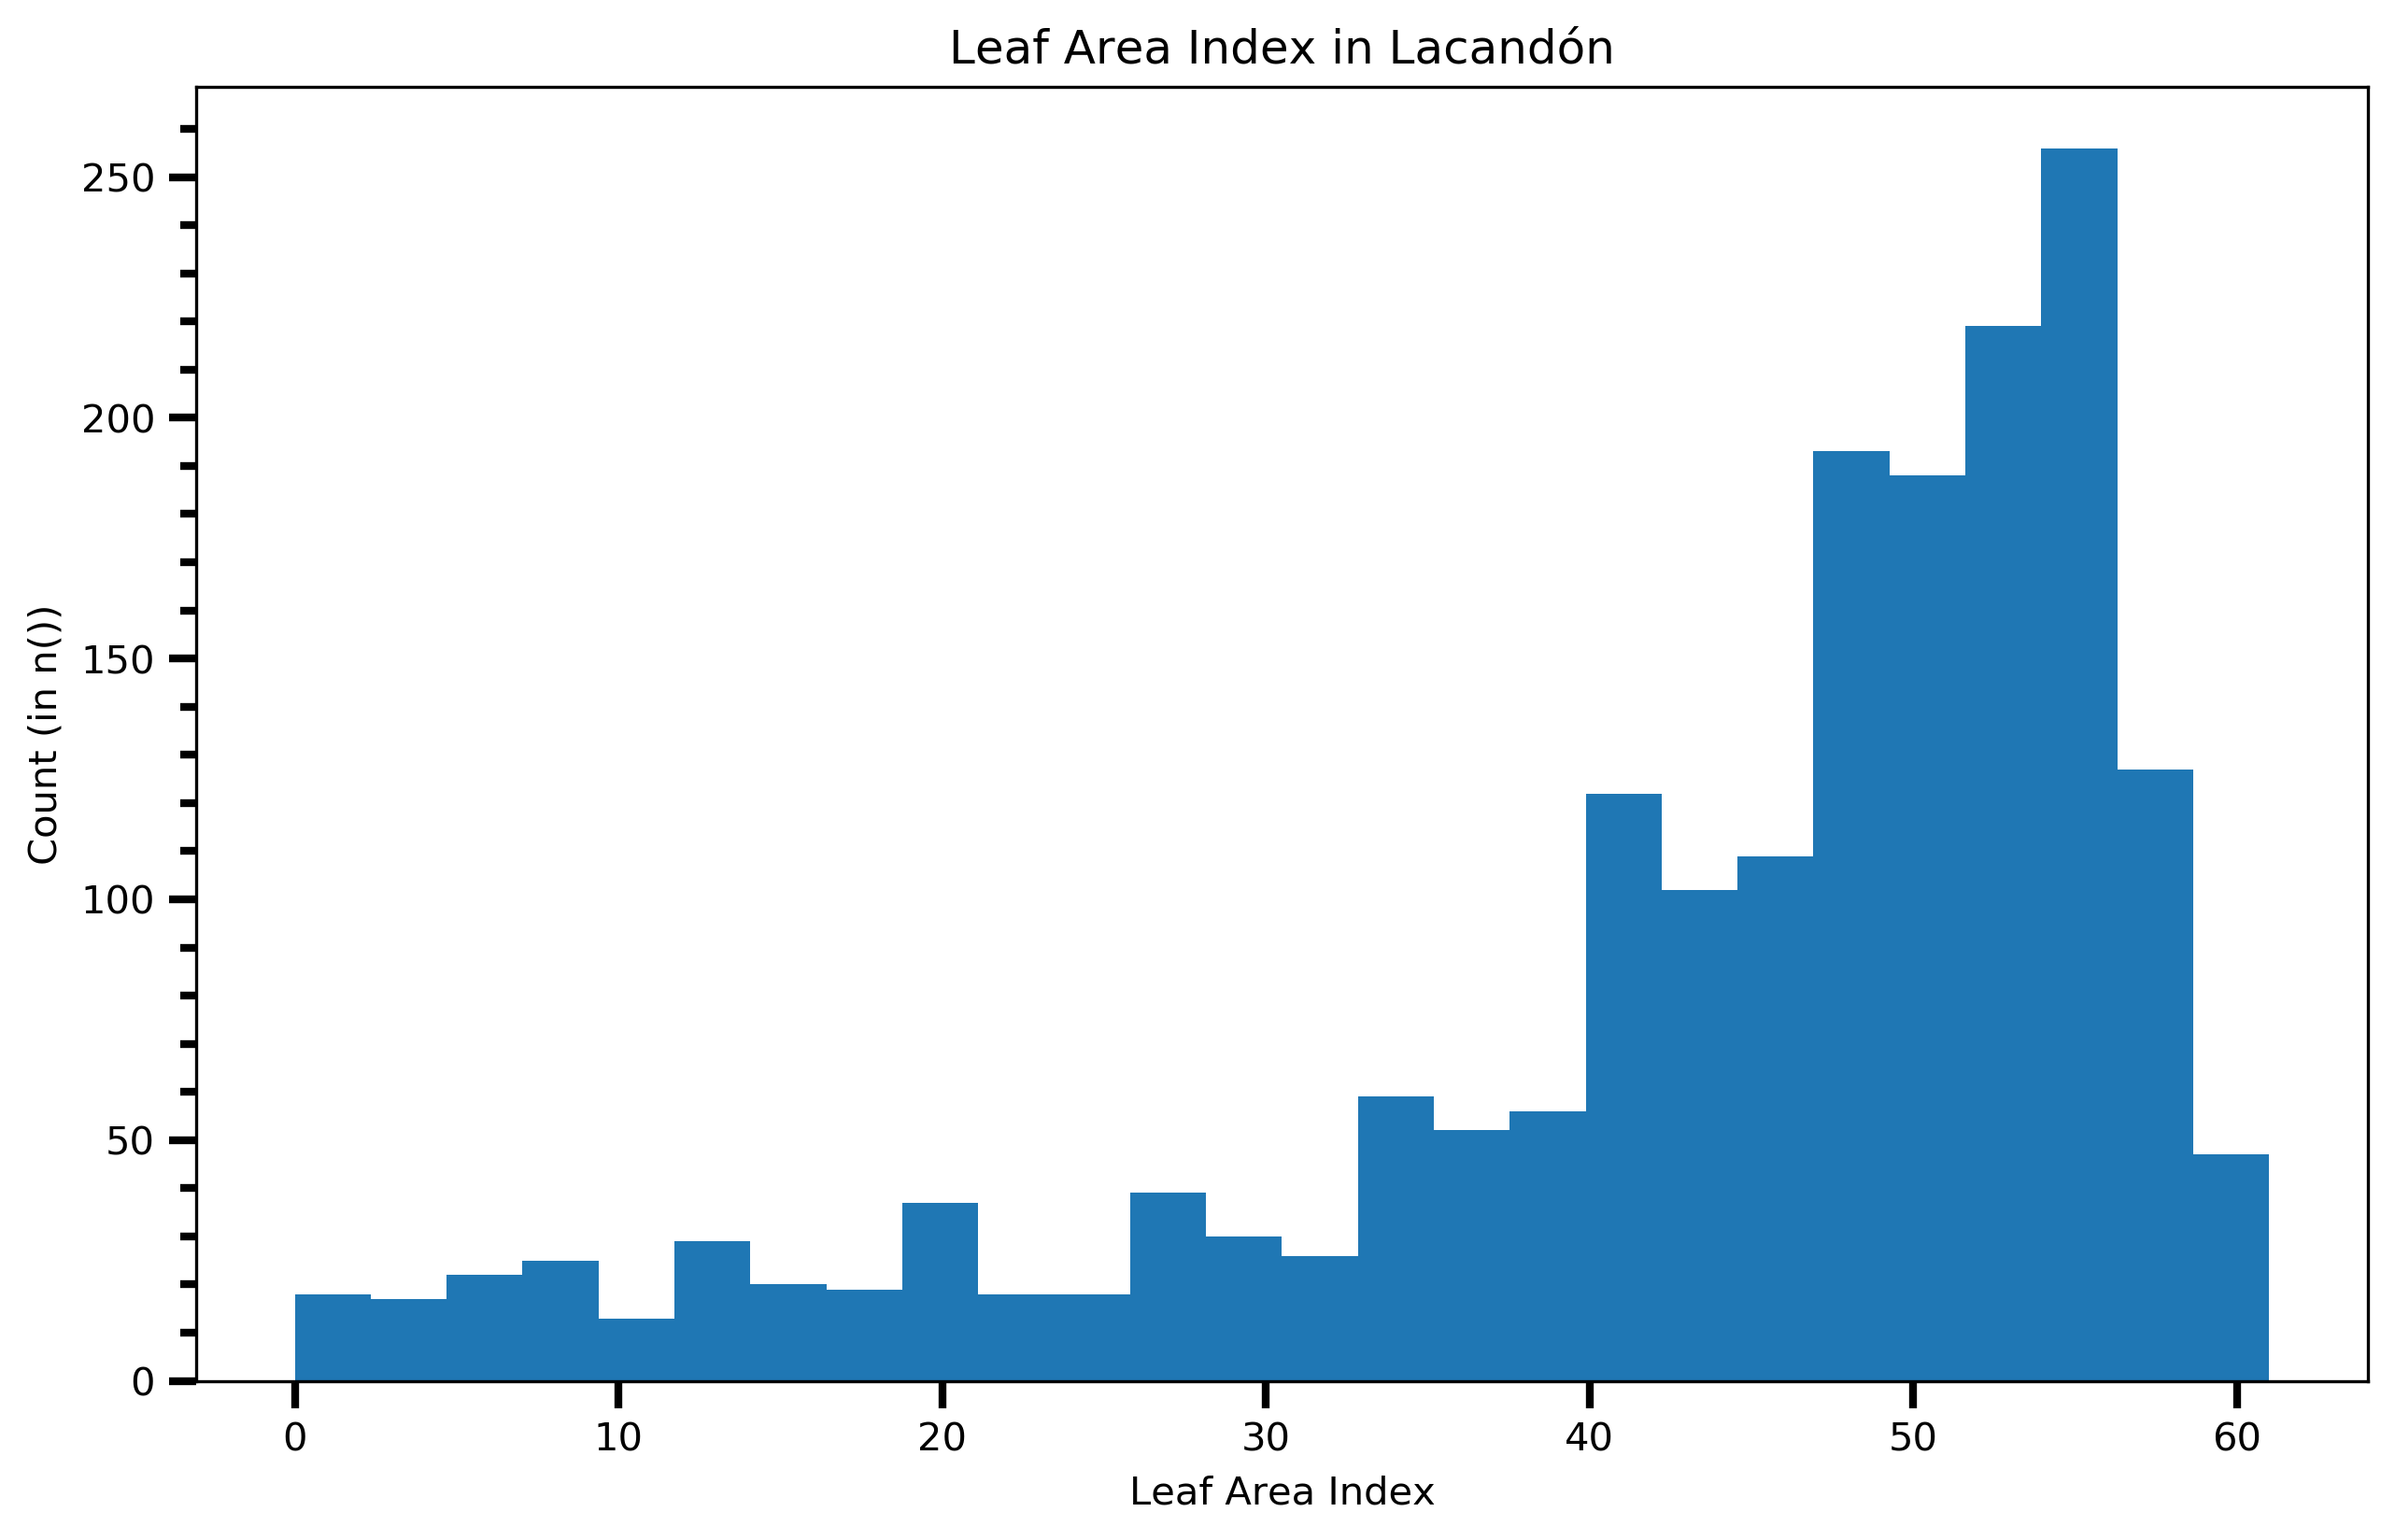

In [14]:
# create histogram plot using Matplotlib
fig, ax = plt.subplots(figsize = (10, 6), dpi = 300) # create figure; set size and resolution (dpi)
n, bins, patches = ax.hist(x = df_laiF['Lai'], bins = 'auto') # add histogram to figure
plt.title('Leaf Area Index in Lacandón') # edit title
plt.xlabel('Leaf Area Index') # add x-axis label
plt.ylabel('Count (in n())') # add y-axis label
ax.yaxis.set_minor_locator(AutoMinorLocator()) # set automatic tick selection for y-axis
ax.tick_params(which = 'both', width = 2) # set major and minor ticks
ax.tick_params(which = 'major', length = 7) # set major ticks
ax.tick_params(which = 'minor', length = 4) # set minor ticks

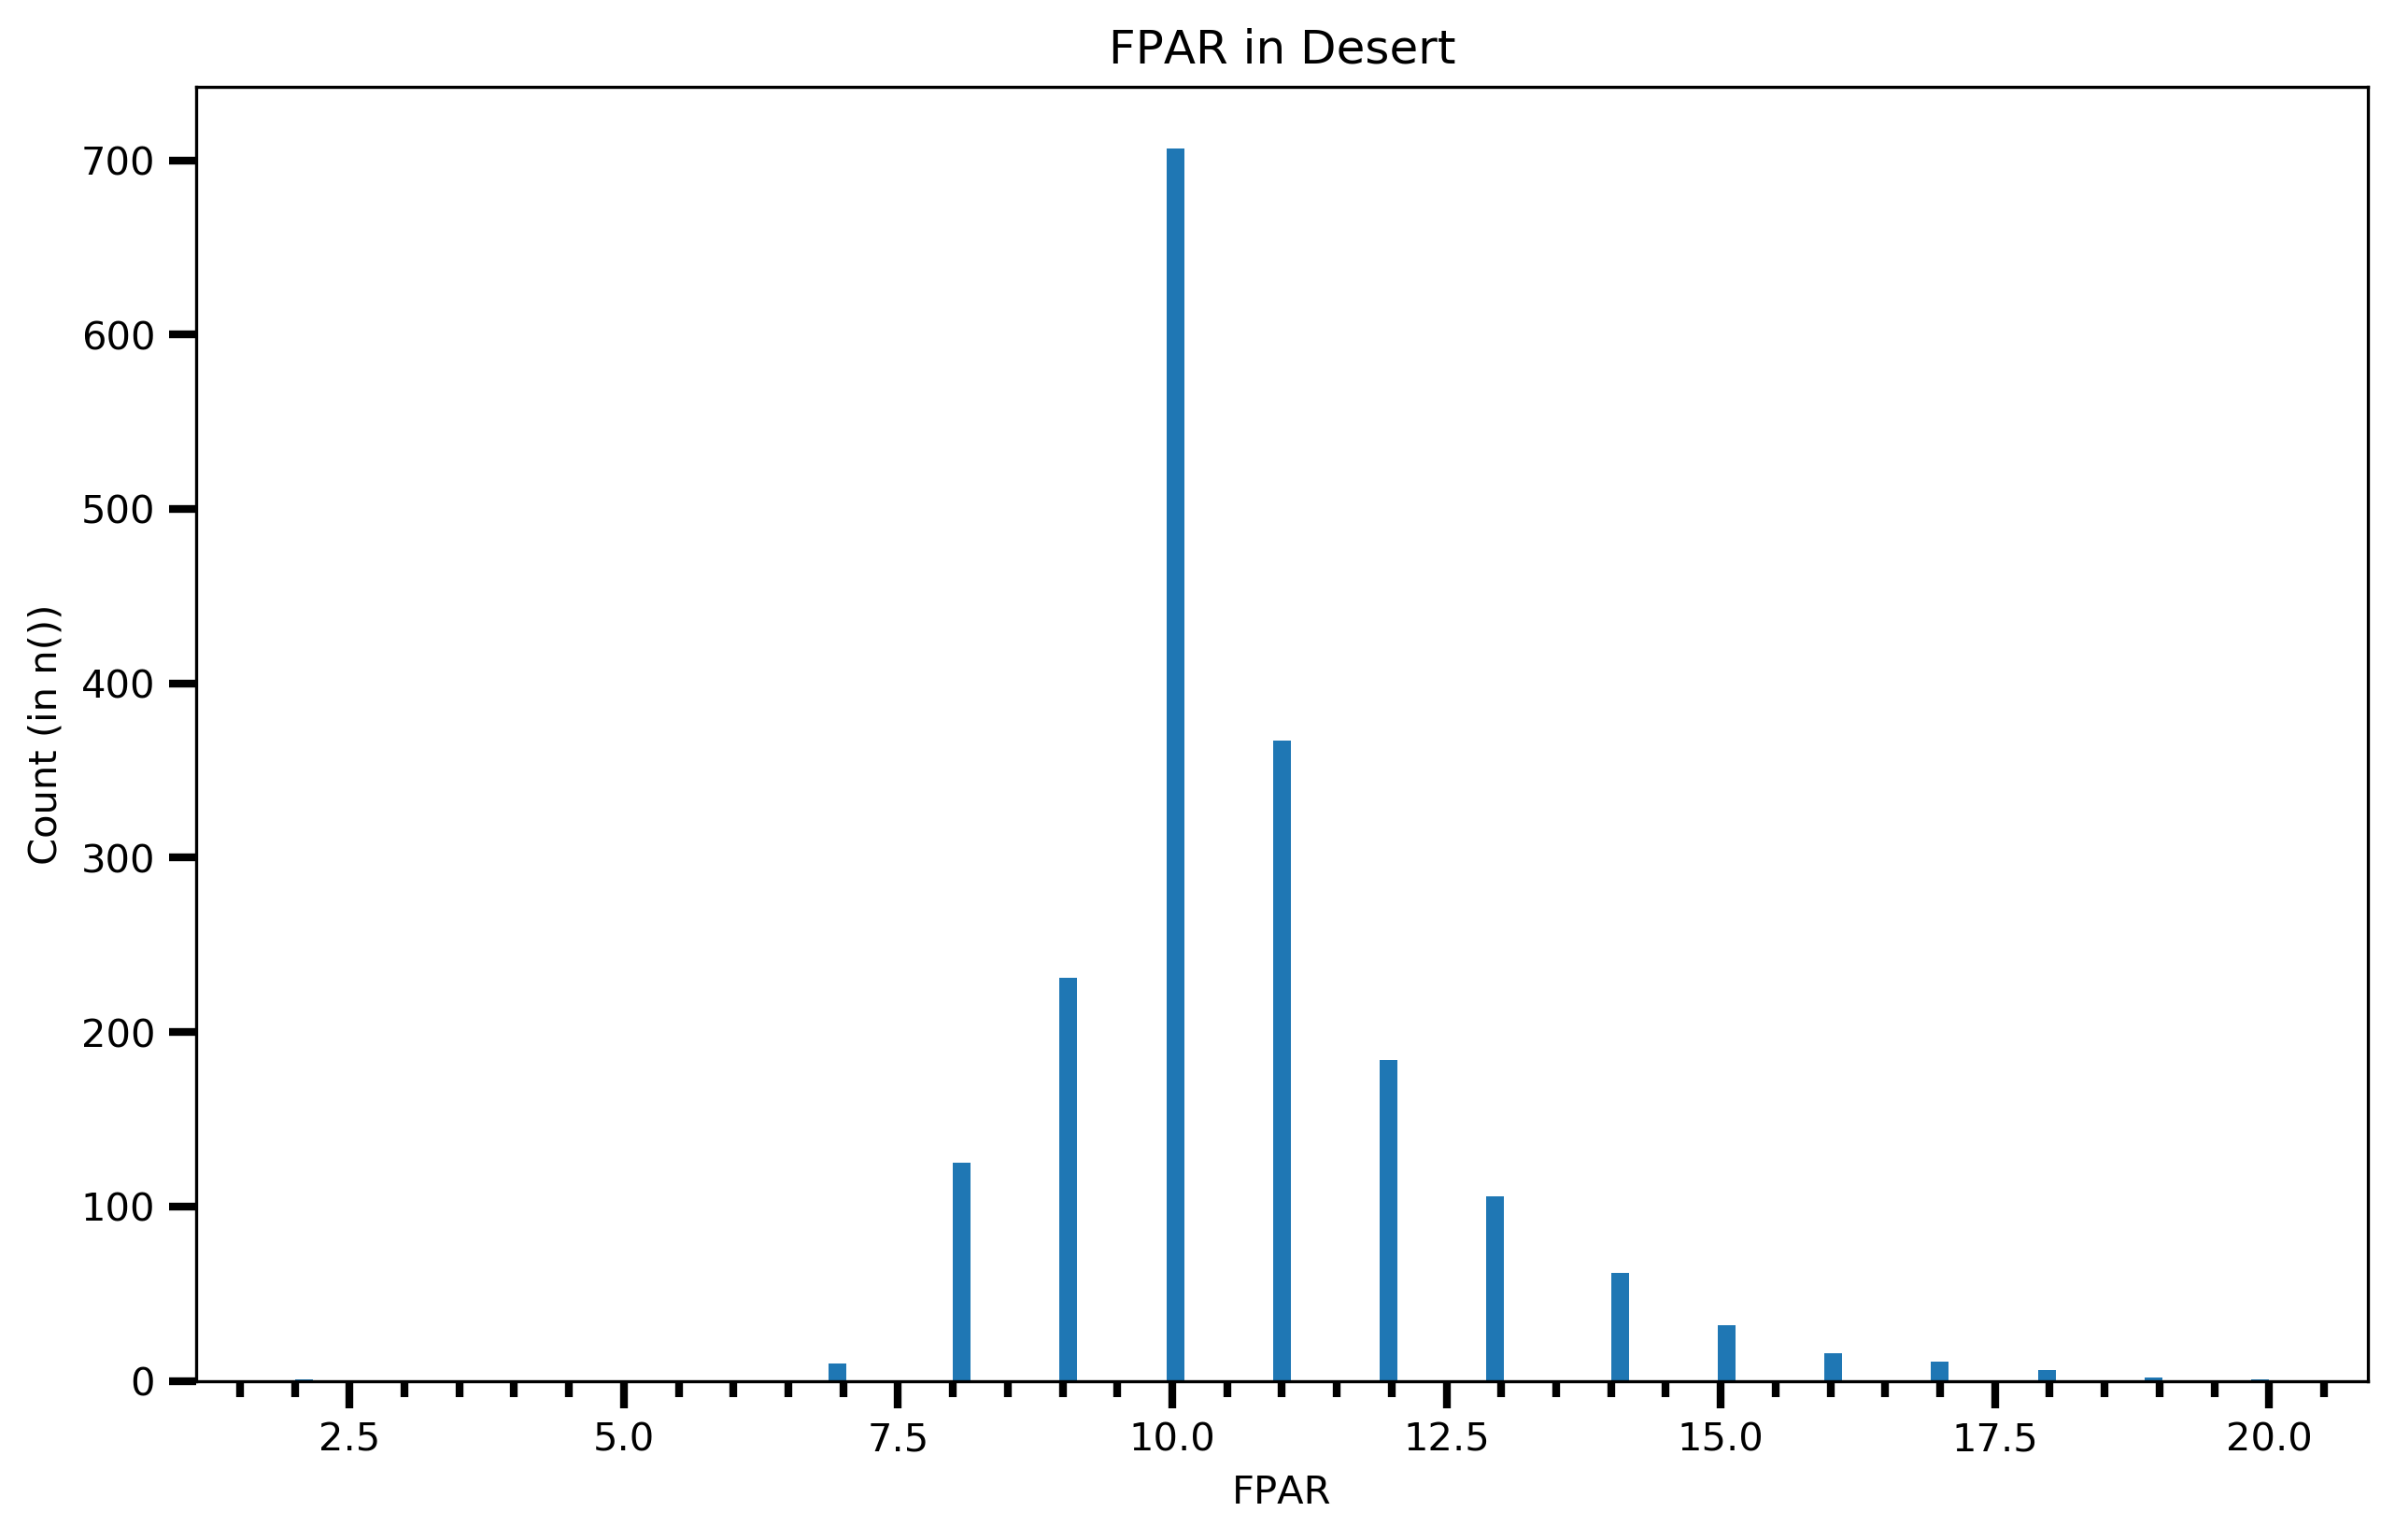

In [15]:
# create histogram plot using Matplotlib
fig, ax = plt.subplots(figsize = (10, 6), dpi = 300) # create figure; set size and resolution (dpi)
n, bins, patches = ax.hist(x = df_fparD['Fpar'], bins = 'auto') # add histogram to figure
plt.title('FPAR in Desert') # edit title
plt.xlabel('FPAR') # add x-axis label
plt.ylabel('Count (in n())') # add y-axis label
ax.xaxis.set_minor_locator(AutoMinorLocator()) # set automatic tick selection for y-axis
ax.tick_params(which = 'both', width = 2) # set major and minor ticks
ax.tick_params(which = 'major', length = 7) # set major ticks
ax.tick_params(which = 'minor', length = 4) # set minor ticks

<a id='usecases'></a> 
### Use Case Examples

This is the "meat" of the notebook, and what will take the majority of the time to present in class. This section should provide:
1) A plain-text summary (1-2 paragraphs) of the use case example you have chosen: include the target users and audience, and potential applicability. 

2) Markdown and code blocks demonstrating how one walks through the desired use case example. This should be similar to the labs we've done in class: you might want to demonstrate how to isolate a particularly interesting time period, then create an image showing a feature you're interested in, for example.

3) A discussion of the results and how they might be extended on further analysis. For example, if there are data quality issues which impact the results, you could discuss how these might be mitigated with additional information/analysis.

Just keep in mind, you'll have roughly 20 minutes for your full presentation, and that goes surprisingly quickly! Probably 2-3 diagnostics is the most you'll be able to get through (you could try practicing with your group members to get a sense of timing).


<a id='binder'></a> 
### Create Binder Environment

The last step is to create a Binder environment for your project, so that we don't have to spend time configuring everyone's environment each time we switch between group presentations. Instructions are below:

 - Assemble all of the data needed in your Github repo: Jupyter notebooks, a README file, and any datasets needed (these should be small, if included within the repo). Larger datasets should be stored on a separate server, and access codes included within the Jupyter notebook as discussed above. 
 
 - Create an _environment_ file: this is a text file which contains information on the packages needed in order to execute your code. The filename should be "environment.yml": an example that you can use for the proper syntax is included in this template repo. To determine which packages to include, you'll probably want to start by displaying the packages loaded in your environment: you can use the command `conda list -n [environment_name]` to get a list.
 
 More information on environment files can be found here:
 https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#

 - Create Binder. Use http://mybinder.org to create a  URL for your notebook Binder (you will need to enter your GitHub repo URL). You can also add a Launch Binder button directly to your GitHub repo, by including the following in your README.md:

```
launch with myBinder
[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/<path to your repo>)
```

<a id='references'></a> 
### References

1. Myneni, R., Knyazikhin, Y., Park, T. (2021). <i>MODIS/Terra+Aqua Leaf Area Index/FPAR 8-Day L4 Global 500m SIN Grid V061</i> [Data set]. NASA EOSDIS Land Processes DAAC. Accessed 2022-11-14 from https://doi.org/10.5067/MODIS/MCD15A2H.061